In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("/Users/tahsin/Documents/Python_programs/financial_crime.csv")
df.head(4)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0


In [3]:
print("shape: ",df.shape)

shape:  (6362620, 11)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
df.isnull().values.any()

False

In [6]:
df.groupby(['isFraud']).count()["step"]

isFraud
0    6354407
1       8213
Name: step, dtype: int64

In [7]:
print("All Types of transactions: ")
df["type"].unique()

All Types of transactions: 


array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [8]:
print("Types of fraud transactions: ")
df[df["isFraud"]==1]["type"].unique()

Types of fraud transactions: 


array(['TRANSFER', 'CASH_OUT'], dtype=object)

In [9]:
print("Number of fraud transaction with TRANSFER: ", len(df[(df["isFraud"]==1)&(df["type"]=="TRANSFER")]))
print("Number of fraud transaction with CASH_OUT: ", len(df[(df["isFraud"]==1)&(df["type"]=="CASH_OUT")]))

Number of fraud transaction with TRANSFER:  4097
Number of fraud transaction with CASH_OUT:  4116


In [10]:
print("Types of flagged fraud transactions: ")
df[df["isFlaggedFraud"]==1]["type"].unique()

Types of flagged fraud transactions: 


array(['TRANSFER'], dtype=object)

In [11]:
print("Is fraud and is flagged fraud:", len(df[(df["isFlaggedFraud"]==1) & (df["isFraud"]==1)]))
print("Is fraud but not flagged fraud:", len(df[(df["isFlaggedFraud"]==0) & (df["isFraud"]==1)]))
print("Is not fraud but flagged fraud:", len(df[(df["isFlaggedFraud"]==1) & (df["isFraud"]==0)]))
print("Is not fraud and not flagged fraud:", len(df[(df["isFlaggedFraud"]==0) & (df["isFraud"]==0)]))

Is fraud and is flagged fraud: 16
Is fraud but not flagged fraud: 8197
Is not fraud but flagged fraud: 0
Is not fraud and not flagged fraud: 6354407


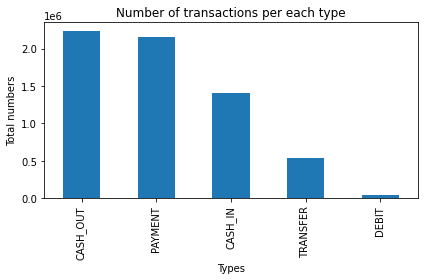

In [12]:
df["type"].value_counts().plot(kind="bar")
plt.title("Number of transactions per each type")
plt.xlabel("Types")
plt.ylabel("Total numbers")
plt.tight_layout()
plt.show()

In [13]:
print(len(df[df["type"]=="TRANSFER"]))
print(len(df[df["type"]=="CASH_OUT"]))

532909
2237500


## Data preprocessing

In [14]:
df_new = df.loc[(df["type"]=="TRANSFER") | (df["type"]=="CASH_OUT")]
df_new.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [15]:
X = df_new[["step","type","amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"]]
y = df_new["isFraud"]

print(X.shape, y.shape)

(2770409, 7) (2770409,)


In [16]:
##binary encoding of column type
X.loc[X.type == 'TRANSFER', 'type'] = 0
X.loc[X.type == 'CASH_OUT', 'type'] = 1
X.type = X.type.astype(int) # convert dtype('O') to dtype(int)
X.head(3)

/Users/tahsin/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/Users/tahsin/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
2,1,0,181.00,181.0,0.0,0.0,0.00
3,1,1,181.00,181.0,0.0,21182.0,0.00
15,1,1,229133.94,15325.0,0.0,5083.0,51513.44


In [17]:
Xfraud = X.loc[y == 1]
XnonFraud = X.loc[y == 0]
print("Fraud: old and new balace dest is zero, but amount not zero:",
      len(Xfraud[(Xfraud.oldbalanceDest == 0) & (Xfraud.newbalanceDest == 0) & (Xfraud.amount!=0)]))
print("Not Fraud: old and new balace dest is zero, but amount not zero:",
      len(XnonFraud.loc[(XnonFraud.oldbalanceDest == 0) & (XnonFraud.newbalanceDest == 0) & (XnonFraud.amount!=0)]))

Fraud: old and new balace dest is zero, but amount not zero: 4070
Not Fraud: old and new balace dest is zero, but amount not zero: 1706


In [18]:
4070/len(Xfraud)

0.4955558261293072

In [19]:
X['errbalanceOrig'] = X["newbalanceOrig"]+X["amount"]-X["oldbalanceOrg"]
X['errbalanceDest'] = X["amount"]+X["oldbalanceDest"]-X["newbalanceDest"]

<ipython-input-19-00a31d261b77>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['errbalanceOrig'] = X["newbalanceOrig"]+X["amount"]-X["oldbalanceOrg"]
<ipython-input-19-00a31d261b77>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['errbalanceDest'] = X["amount"]+X["oldbalanceDest"]-X["newbalanceDest"]


In [20]:
X

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,errbalanceOrig,errbalanceDest
2,1,0,181.00,181.00,0.0,0.00,0.00,0.00,1.810000e+02
3,1,1,181.00,181.00,0.0,21182.00,0.00,0.00,2.136300e+04
15,1,1,229133.94,15325.00,0.0,5083.00,51513.44,213808.94,1.827035e+05
19,1,0,215310.30,705.00,0.0,22425.00,0.00,214605.30,2.377353e+05
24,1,0,311685.89,10835.00,0.0,6267.00,2719172.89,300850.89,-2.401220e+06
...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,339682.13,0.0,0.00,339682.13,0.00,0.000000e+00
6362616,743,0,6311409.28,6311409.28,0.0,0.00,0.00,0.00,6.311409e+06
6362617,743,1,6311409.28,6311409.28,0.0,68488.84,6379898.11,0.00,1.000000e-02
6362618,743,0,850002.52,850002.52,0.0,0.00,0.00,0.00,8.500025e+05


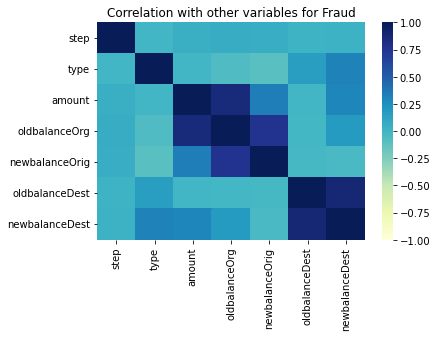

Text(0.5, 1.0, 'Correlation with other variables for Non-Fraud')

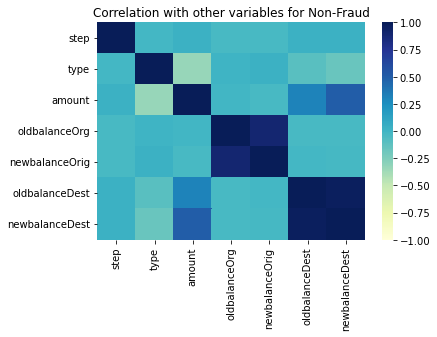

In [21]:
fraud_corr = Xfraud.corr()
sns.heatmap(fraud_corr,cmap="YlGnBu",vmin=-1,vmax=1)
plt.title("Correlation with other variables for Fraud")
plt.show()
nonfraud_corr = XnonFraud.corr()
sns.heatmap(nonfraud_corr,cmap="YlGnBu",vmin=-1,vmax=1)
plt.title("Correlation with other variables for Non-Fraud")

In [22]:
print('skew = ',( len(Xfraud) / float(len(X)) ))

skew =  0.002964544224336551


## ML Model & Training

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [24]:
from sklearn.metrics import average_precision_score,plot_precision_recall_curve,precision_recall_curve
from xgboost.sklearn import XGBClassifier
from xgboost import plot_importance, to_graphviz

In [25]:
weights = (y==0).sum()/(y==1).sum() #useful for imbalanced datasets
clf = XGBClassifier(max_depth=3, scale_pos_weight = weights, n_jobs=4)
clf.fit(X_train,y_train)

/Users/tahsin/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:25:20] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=336.3199805186899,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [26]:
y_pred = clf.predict(X_test)

In [27]:
precision_score = average_precision_score(y_test,y_pred)
print("AUPRC: ", precision_score)

AUPRC:  0.9909143021915807


/Users/tahsin/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


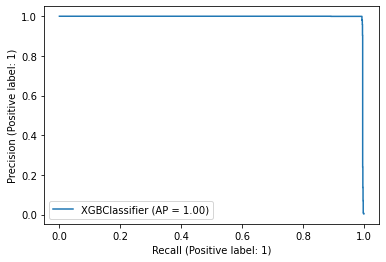

In [28]:
plot_precision_recall_curve(clf, X_test, y_test)

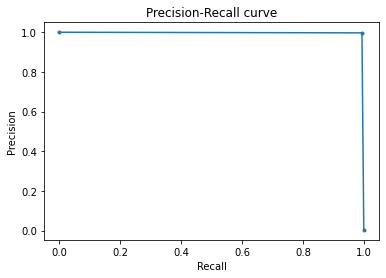

In [29]:
lr_precision, lr_recall, _ = precision_recall_curve(y_test, y_pred)
plt.plot(lr_recall,lr_precision,marker=".")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall curve")
plt.show()

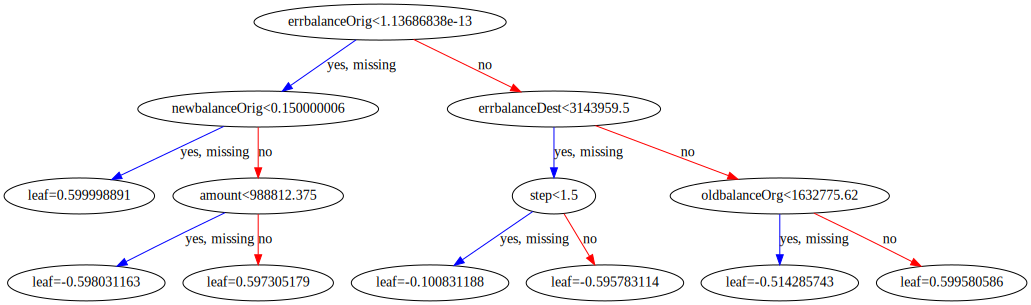

In [30]:
from xgboost import plot_importance, to_graphviz
to_graphviz(clf)

## Using imbalance learning: undersampling

In [36]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)

In [37]:
X_undersample, y_undersample = rus.fit_resample(X,y)

In [38]:
from sklearn.model_selection import train_test_split
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_undersample, y_undersample, test_size = 0.2, random_state = 42)

In [43]:
from sklearn.ensemble import RandomForestClassifier
rfc_u = RandomForestClassifier(max_depth=3, random_state=0)
rfc_u.fit(X_train_undersample,y_train_undersample)

RandomForestClassifier(max_depth=3, random_state=0)

In [44]:
y_pred_undersample = rfc_u.predict(X_test_undersample)

In [45]:
precision_score = average_precision_score(y_test_undersample,y_pred_undersample)
print("AUPRC using undersampling Random Forest: ", precision_score)

AUPRC using undersampling Random Forest:  0.9875914685372407


## Using imbalance learning: oversampling

In [46]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)

In [47]:
X_oversample, y_oversample = ros.fit_resample(X,y)

In [48]:
from sklearn.model_selection import train_test_split
X_train_oversample, X_test_oversample, y_train_oversample, y_test_oversample= train_test_split(X_oversample, y_oversample, test_size = 0.2, random_state = 42)

In [49]:
from sklearn.ensemble import RandomForestClassifier
roc_u = RandomForestClassifier(max_depth=3, random_state=0)
roc_u.fit(X_train_oversample,y_train_oversample)

RandomForestClassifier(max_depth=3, random_state=0)

In [50]:
y_pred_oversample = roc_u.predict(X_test_oversample)

In [51]:
precision_score = average_precision_score(y_test_oversample,y_pred_oversample)
print("AUPRC using oversampling Random Forest: ", precision_score)

AUPRC using oversampling Random Forest:  0.985621572695075


## Using imbalance learning: SMOTE

In [52]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)

In [53]:
X_smote, y_smote = sm.fit_resample(X,y)

In [54]:
from sklearn.model_selection import train_test_split
X_train_smote, X_test_smote, y_train_smote, y_test_smote= train_test_split(X_smote, y_smote, test_size = 0.2, random_state = 42)

In [55]:
from sklearn.ensemble import RandomForestClassifier
rfs = RandomForestClassifier(max_depth=3, random_state=0)
rfs.fit(X_train_smote,y_train_smote)

RandomForestClassifier(max_depth=3, random_state=0)

In [56]:
y_pred_smote = rfs.predict(X_test_smote)

In [57]:
precision_score = average_precision_score(y_test_smote,y_pred_smote)
print("AUPRC using oversampling Random Forest: ", precision_score)

AUPRC using oversampling Random Forest:  0.9850964906028733
